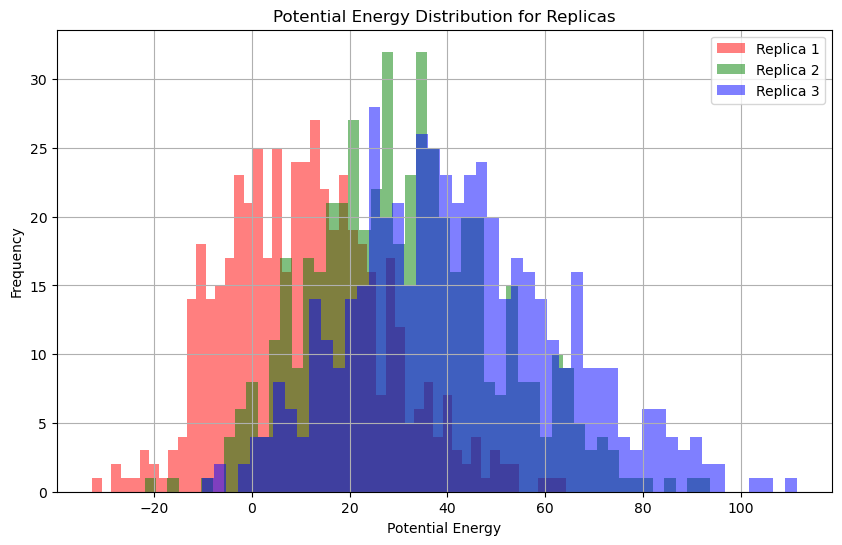

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# List of energy file names for each replica
energy_files = ["/home/yk3019/comp-lab-class-2023/Week5/analysis/T300_energy.xvg", 
                "/home/yk3019/comp-lab-class-2023/Week5/analysis/T363_energy.xvg", 
                "/home/yk3019/comp-lab-class-2023/Week5/analysis/T400_potential.xvg"]

# Create an empty list to store energy data for each replica
energy_data = []

# Read energy data from each file and store it in the energy_data list
for file in energy_files:
    with open(file, 'r') as f:
        lines = f.readlines()
        energy_values = [float(line.split()[1]) for line in lines if not line.startswith(('#', '@'))]
        energy_data.append(energy_values)

# Create a histogram for each replica's energy data
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']  # Change these colors as needed

for i, energy_values in enumerate(energy_data):
    plt.hist(energy_values, bins=50, alpha=0.5, label=f"Replica {i+1}", color=colors[i])

# Customize the plot
plt.xlabel('Potential Energy')
plt.ylabel('Frequency')
plt.legend()
plt.title('Potential Energy Distribution for Replicas')
plt.grid(True)

# Show the plot or save it to a file
plt.show()


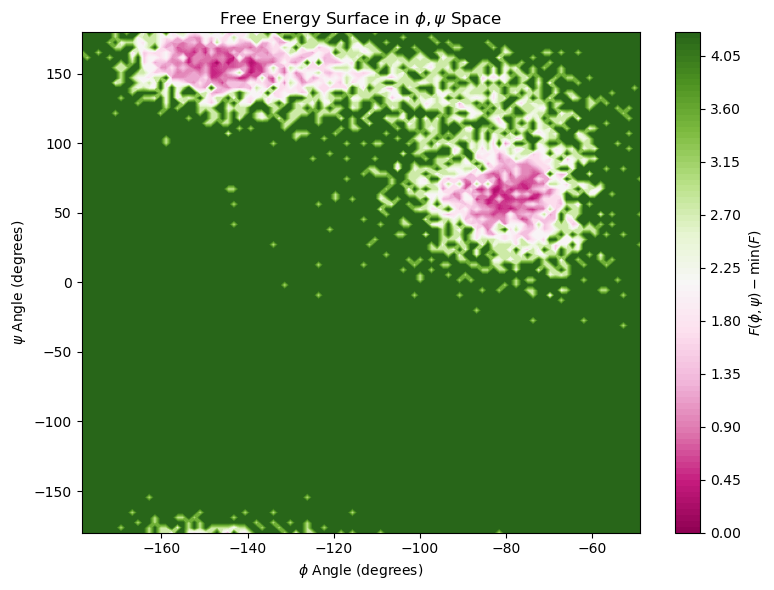

In [9]:
import mdtraj as md
import matplotlib.pyplot as plt
import math

# Load the trajectory and topology files
trajectory_file = '/home/yk3019/comp-lab-class-2023/Week5/data/T300/adp_exchange3temps.trr'
topology_file = '/home/yk3019/comp-lab-class-2023/Week5/data/T300/adp_exchange3temps.gro'
# Load the trajectory using MDTraj
traj = md.load(trajectory_file, top=topology_file)

# Compute the phi and psi dihedral angles
phi_indices, phi_angles = md.compute_phi(traj, periodic=False)
psi_indices, psi_angles = md.compute_psi(traj, periodic=False)

# Convert radians to degrees for phi and psi angles
phi_angles_deg = [math.degrees(angle) for angle in phi_angles]
psi_angles_deg = [math.degrees(angle) for angle in psi_angles]

# Define the number of bins for the 2D histogram
num_bins = 100

# Compute the 2D histogram
hist, xedges, yedges = np.histogram2d(phi_angles_deg, psi_angles_deg, bins=num_bins, normed=True)

# Avoid log(0) when computing free energy
hist[hist == 0] = 1e-5

# Compute free energy
F = -np.log(hist)

# Subtract the minimum free energy
F -= np.min(F)

plt.figure(figsize=(8, 6))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.contourf(F.T, 100, cmap="PiYG", extent=extent,)
plt.colorbar(label=r"$F(\phi, \psi) - \min(F)$")
plt.xlabel(r'$\phi$ Angle (degrees)')
plt.ylabel(r'$\psi$ Angle (degrees)')
plt.title('Free Energy Surface in $\phi, \psi$ Space')
plt.tight_layout()
plt.show()

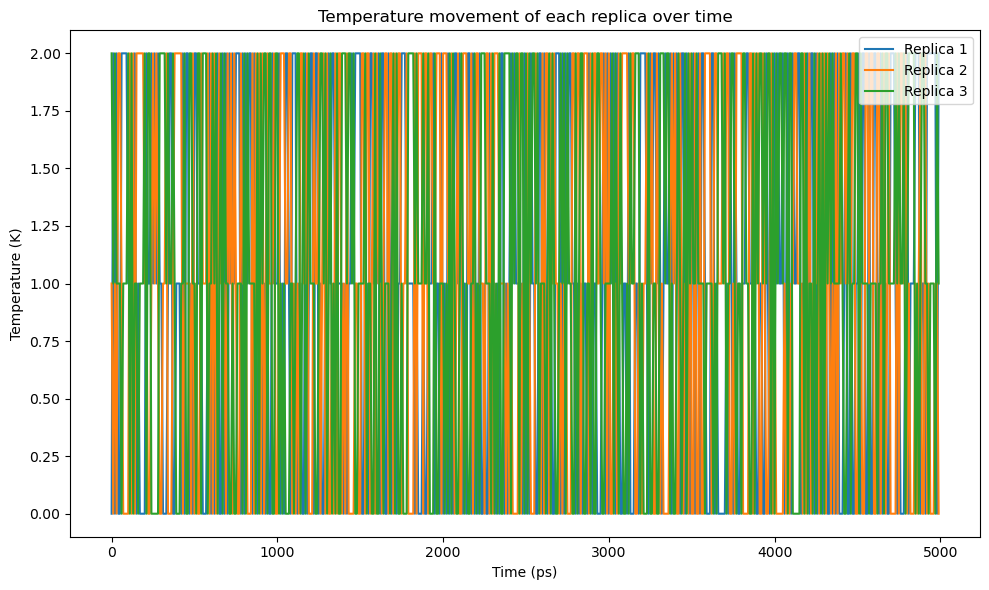

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Set the interval for visualization (e.g., every 100 frames)
replica = np.loadtxt('/home/yk3019/comp-lab-class-2023/Week5/data/T300/replica_temp.xvg')

time = replica[:, 0]
replica_temps = replica[:, 1:]

# Only plot every 1000th/100th point
time = time[::100]
replica_temps = replica_temps[::100, :]

# Plot
plt.figure(figsize=(10, 6))
for i, replica in enumerate(replica_temps.T, start=1):
    plt.plot(time, replica, label=f'Replica {i}')

plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature movement of each replica over time')
plt.legend()
plt.tight_layout()
plt.show()



